# This notebook contains all the operations required to create the experimental subset of data from the original dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

/home/zach/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Drop all images with more than one finding.

In [2]:
# Read in image file names and finding labels
dataset = pd.read_csv('datasets/Data_Entry_2017_v2020.csv', usecols=['Image Index', 'Finding Labels'])
print (f"Data: \n{dataset}")
print(f"\nShape: {dataset.shape}")

Data: 
             Image Index          Finding Labels
0       00000001_000.png            Cardiomegaly
1       00000001_001.png  Cardiomegaly|Emphysema
2       00000001_002.png   Cardiomegaly|Effusion
3       00000002_000.png              No Finding
4       00000003_001.png                  Hernia
...                  ...                     ...
112115  00030801_001.png          Mass|Pneumonia
112116  00030802_000.png              No Finding
112117  00030803_000.png              No Finding
112118  00030804_000.png              No Finding
112119  00030805_000.png              No Finding

[112120 rows x 2 columns]

Shape: (112120, 2)


In [3]:
# Get all images with a single finding
dropped = 0 

for index in dataset.index:
    # Split findings into list
    findings = dataset.at[index, 'Finding Labels'].split('|')
    
    # Drop record if it has more than one finding
    if len(findings) > 1:
        dropped += 1
        dataset.drop(index, inplace=True)
        
print(f"Dropped {dropped} records")
print(dataset.shape)

Dropped 20796 records
(91324, 2)


In [ ]:
# Cache trimmed data (records with single findings only)
# dataset.to_csv("single_finding_data.csv")

# Apply downsampling to the 'No Finding' and 'Infiltration' records. Only keep 5,488 (~9%) of 'No Finding' records and 4,774 (50%) of 'Infiltration' records.

In [4]:
dataset = pd.read_csv('datasets/single_finding_data.csv', usecols=['Image Index', 'Finding Labels'])
print (f"Data: \n{dataset}")
print(f"\nShape: {dataset.shape}")

Data: 
             Image Index          Finding Labels
0       00000001_000.png            Cardiomegaly
1       00000001_001.png  Cardiomegaly|Emphysema
2       00000001_002.png   Cardiomegaly|Effusion
3       00000002_000.png              No Finding
4       00000003_001.png                  Hernia
...                  ...                     ...
112115  00030801_001.png          Mass|Pneumonia
112116  00030802_000.png              No Finding
112117  00030803_000.png              No Finding
112118  00030804_000.png              No Finding
112119  00030805_000.png              No Finding

[112120 rows x 2 columns]

Shape: (112120, 2)


In [8]:
# Get unque findings (i.e. medical conditions) amongst data
findings = []
for finding in dataset['Finding Labels']:
    if finding not in findings:
        findings.append(finding)
        
print(findings)
print(f"Number of unique findings: {len(findings)}")

[['Cardiomegaly'], ['Cardiomegaly', 'Emphysema'], ['Cardiomegaly', 'Effusion'], ['No Finding'], ['Hernia'], ['Hernia', 'Infiltration'], ['Mass', 'Nodule'], ['Infiltration'], ['Effusion', 'Infiltration'], ['Nodule'], ['Emphysema'], ['Effusion'], ['Atelectasis'], ['Effusion', 'Mass'], ['Infiltration', 'Mass'], ['Infiltration', 'Mass', 'Pneumothorax'], ['Mass'], ['Cardiomegaly', 'Infiltration', 'Mass', 'Nodule'], ['Cardiomegaly', 'Effusion', 'Emphysema', 'Mass'], ['Atelectasis', 'Cardiomegaly', 'Emphysema', 'Mass', 'Pneumothorax'], ['Emphysema', 'Mass'], ['Emphysema', 'Mass', 'Pneumothorax'], ['Pneumothorax'], ['Emphysema', 'Pneumothorax'], ['Atelectasis', 'Pneumothorax'], ['Cardiomegaly', 'Emphysema', 'Pneumothorax'], ['Mass', 'Pleural_Thickening'], ['Cardiomegaly', 'Mass', 'Pleural_Thickening'], ['Pleural_Thickening'], ['Effusion', 'Emphysema', 'Infiltration', 'Pneumothorax'], ['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax'], ['Effusion', 'Pneumonia', 'Pneumothorax'],

Cardiomegaly: 2776 (2.48%)
Cardiomegaly|Emphysema: 22 (0.02%)
Cardiomegaly|Effusion: 923 (0.82%)
No Finding: 60361 (53.84%)
Hernia: 227 (0.20%)
Hernia|Infiltration: 33 (0.03%)
Mass|Nodule: 894 (0.80%)
Infiltration: 19894 (17.74%)
Effusion|Infiltration: 3865 (3.45%)
Nodule: 6331 (5.65%)
Emphysema: 2516 (2.24%)
Effusion: 13317 (11.88%)
Atelectasis: 11559 (10.31%)
Effusion|Mass: 877 (0.78%)
Infiltration|Mass: 1155 (1.03%)
Infiltration|Mass|Pneumothorax: 51 (0.05%)
Mass: 5782 (5.16%)
Cardiomegaly|Infiltration|Mass|Nodule: 1 (0.00%)
Cardiomegaly|Effusion|Emphysema|Mass: 3 (0.00%)
Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax: 1 (0.00%)
Emphysema|Mass: 165 (0.15%)
Emphysema|Mass|Pneumothorax: 40 (0.04%)
Pneumothorax: 5302 (4.73%)
Emphysema|Pneumothorax: 487 (0.43%)
Atelectasis|Pneumothorax: 240 (0.21%)
Cardiomegaly|Emphysema|Pneumothorax: 2 (0.00%)
Mass|Pleural_Thickening: 353 (0.31%)
Cardiomegaly|Mass|Pleural_Thickening: 3 (0.00%)
Pleural_Thickening: 3385 (3.02%)
Effusion|Emphysema|I

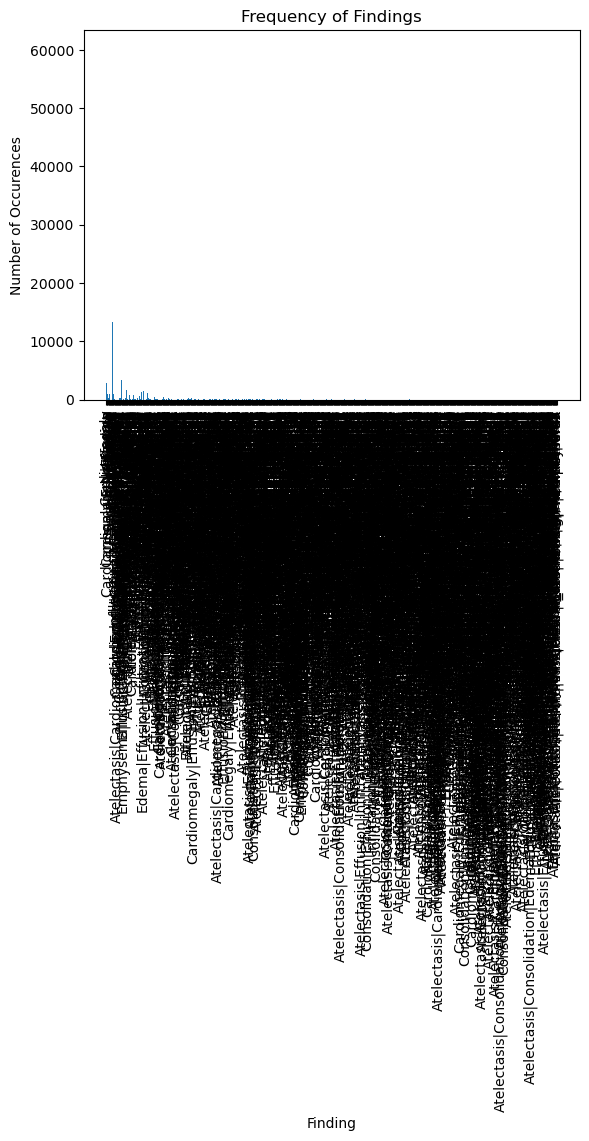

In [6]:
# Count the number of occurences of each finding
counts = {}
for finding in findings:
    counts[finding] = 0
    for label in dataset['Finding Labels']:
        counts[finding] += label.count(finding)
        
# Pretty-print results
for count in counts:
    print(f"{count}: {counts[count]} ({counts[count]/dataset.shape[0]*100:.2f}%)")

# Graph results
plt.bar(list(counts.keys()), list(counts.values()))
plt.title('Frequency of Findings')
plt.ylabel('Number of Occurences')
plt.xlabel('Finding')
plt.xticks(rotation=90);
plt.show()

In [6]:
# # Only keep 5,488 (~9%) of 'No Finding' records
  # and 4,774 (50%) of 'Infiltration' records
    
# Counts for displaying    
nf_dropped = 0
nf_kept = 0
i_dropped = 0

# Drop counters
nf_count = 0
i_count = 0

for index in dataset.index:
        if dataset.at[index, 'Finding Labels'] == 'Infiltration':
            # Drop every other 'Infiltration' record
            if i_count == 0:
                dataset.drop(index, inplace=True)
                i_count += 1
                i_dropped += 1
            else:
                i_count = 0
        elif dataset.at[index, 'Finding Labels'] == 'No Finding':
            # Keep 'No Finding' when count == 0 (9%)
            if nf_count == 0:
                nf_kept += 1
                nf_count += 10
                continue
            else:
                dataset.drop(index, inplace=True)
                nf_count -= 1
                nf_dropped += 1
        else:
            continue

print(f"Dropped 'No Findings' records: {nf_dropped}")
print(f"Kept 'No Findings' records: {nf_kept}")
print(f"Dropped 'Infiltration' records: {i_dropped}")

Dropped 'No Findings' records: 54873
Kept 'No Findings' records: 5488
Dropped 'Infiltration' records: 4774


In [7]:
# Cache downsampled data
# dataset.to_csv("datasets/single_finding_downsampled_data.csv")

# Only keep findings with more than 3,000 records.

In [9]:
# Read in image file names and finding labels
dataset = pd.read_csv('datasets/single_finding_downsampled_data.csv', usecols=['Image Index', 'Finding Labels'])
print (f"Data: \n{dataset}")
print(f"\nShape: {dataset.shape}")

Data: 
            Image Index Finding Labels
0      00000002_000.png     No Finding
1      00000010_000.png   Infiltration
2      00000011_000.png       Effusion
3      00000011_002.png     No Finding
4      00000011_006.png    Atelectasis
...                 ...            ...
18426  00030777_000.png     No Finding
18427  00030780_000.png    Atelectasis
18428  00030786_000.png       Effusion
18429  00030791_000.png     No Finding
18430  00030802_000.png     No Finding

[18431 rows x 2 columns]

Shape: (18431, 2)


In [10]:
# Get unque findings (i.e. medical conditions) amongst data
findings = []
for finding in dataset['Finding Labels']:
    if finding not in findings:
        findings.append(finding)
print(findings)
print(f"Number of unique findings: {len(findings)}")

['No Finding', 'Infiltration', 'Effusion', 'Atelectasis']
Number of unique findings: 4


No Finding: 5488 (29.78%)
Infiltration: 4773 (25.90%)
Effusion: 3955 (21.46%)
Atelectasis: 4215 (22.87%)


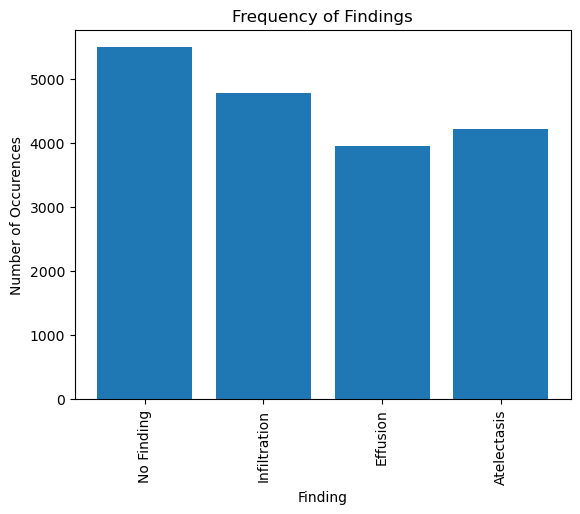

In [11]:
# Count the number of occurences of each finding
counts = {}
for finding in findings:
    counts[finding] = 0
    for label in dataset['Finding Labels']:
        counts[finding] += label.count(finding)
        
# Pretty-print results
for count in counts:
    print(f"{count}: {counts[count]} ({counts[count]/dataset.shape[0]*100:.2f}%)")

# Graph results
plt.bar(list(counts.keys()), list(counts.values()))
plt.title('Frequency of Findings')
plt.ylabel('Number of Occurences')
plt.xlabel('Finding')
plt.xticks(rotation=90);
plt.show()

In [15]:
# # Split the data into images and labels
# x = []
# y = []

# for index in dataset.index: 
#     x.append(dataset.loc[index, 'Image Index'])
#     y.append(dataset.loc[index, 'Finding Labels'])

# print(f'Image: {x[0]}')
# print(f'Label: {y[0]}')
# print(f'X length: {len(x)}')
# print(f'Y legnth: {len(y)}')

In [12]:
to_delete = [finding for finding in counts if counts[finding] < 3000]
print(f"Findings to delete: \n {to_delete}")

Findings to delete: 
 ['Cardiomegaly', 'Hernia', 'Nodule', 'Emphysema', 'Mass', 'Pneumothorax', 'Pleural_Thickening', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']


In [13]:
# Remove records with fewer than 3,000 records
removed = 0
for index in dataset.index:
    if dataset.at[index, 'Finding Labels'] in to_delete:
        removed += 1
        dataset.drop(index, inplace=True)
print(f"Removed {removed} records")

Removed 13246 records


In [17]:
# Cache trimmed data (remove Findings with fewer than 3000 records)
# dataset.to_csv('datasets/single_finding_downsampled_3k_min_data.csv')

# Separate into training, testing, and validation set

In [19]:
dataset = pd.read_csv('datasets/single_finding_downsampled_3k_min_data.csv',
                      usecols=['Image Index', 'Finding Labels'])

print (f"Data: \n{dataset}")
print(f"\nShape: {dataset.shape}")

Data: 
            Image Index Finding Labels
0      00000002_000.png     No Finding
1      00000010_000.png   Infiltration
2      00000011_000.png       Effusion
3      00000011_002.png     No Finding
4      00000011_006.png    Atelectasis
...                 ...            ...
18426  00030777_000.png     No Finding
18427  00030780_000.png    Atelectasis
18428  00030786_000.png       Effusion
18429  00030791_000.png     No Finding
18430  00030802_000.png     No Finding

[18431 rows x 2 columns]

Shape: (18431, 2)


No Finding: 5488 (29.78%)
Infiltration: 4773 (25.90%)
Effusion: 3955 (21.46%)
Atelectasis: 4215 (22.87%)


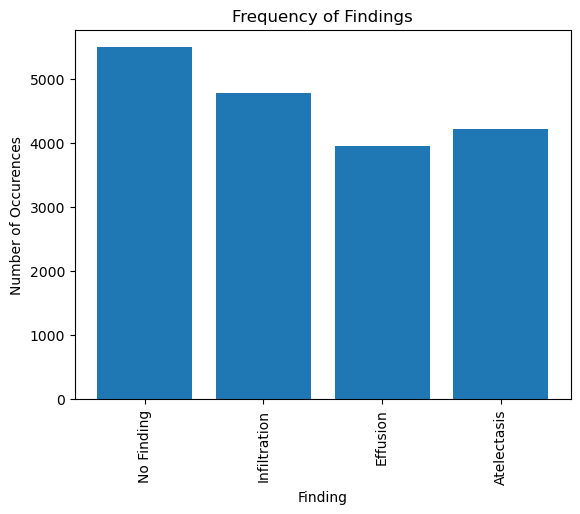

In [21]:
# Get unque findings (i.e. medical conditions) amongst data
findings = []
for finding in dataset['Finding Labels']:
    if finding not in findings:
        findings.append(finding)

# Count unique results
counts = {}
for finding in findings:
    counts[finding] = 0
    for label in dataset['Finding Labels']:
        counts[finding] += label.count(finding)
        
# Pretty-print results
for count in counts:
    print(f"{count}: {counts[count]} ({counts[count]/dataset.shape[0]*100:.2f}%)")

# Graph results
plt.bar(list(counts.keys()), list(counts.values()))
plt.title('Frequency of Findings')
plt.ylabel('Number of Occurences')
plt.xlabel('Finding')
plt.xticks(rotation=90);
plt.show()

In [22]:
# Split the data into images and labels
x = []
y = []

for index in dataset.index: 
    x.append(dataset.loc[index, 'Image Index'])
    y.append(dataset.loc[index, 'Finding Labels'])

print(f'Image: {x[0]}')
print(f'Label: {y[0]}')
print(f'X length: {len(x)}')
print(f'Y legnth: {len(y)}')

Image: 00000002_000.png
Label: No Finding
X length: 18431
Y legnth: 18431


In [23]:
# Train:test split (70:30)
train_image, test_image, train_label, test_label = train_test_split(
        x, y, train_size=0.7, shuffle=True, random_state=42)

# Test:validation split (50:50)
test_image, val_image, test_label, val_label = train_test_split(
    test_image, test_label, train_size=0.5, shuffle=True, random_state=42)

In [24]:
# Cache sets to csv

train = pd.DataFrame()
train['Image Index'] = train_image
train['Finding Label'] = train_label
train.to_csv('datasets/train_set.csv')

test = pd.DataFrame()
test['Image Index'] = test_image
test['Finding Label'] = test_label
test.to_csv('datasets/test_set.csv')

val = pd.DataFrame()
val['Image Index'] = val_image
val['Finding Label'] = val_label
val.to_csv('datasets/val_set.csv')